In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('C:\\Users\\Admin\\python\\scikit-learn\\heart.csv')

In [5]:
df.head

<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  outp

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df.drop_duplicates(keep ='first',inplace = True)

*** Gender Categories ***

Numbers of people having sex as 1 are 206 and number of people having sex as 0 96


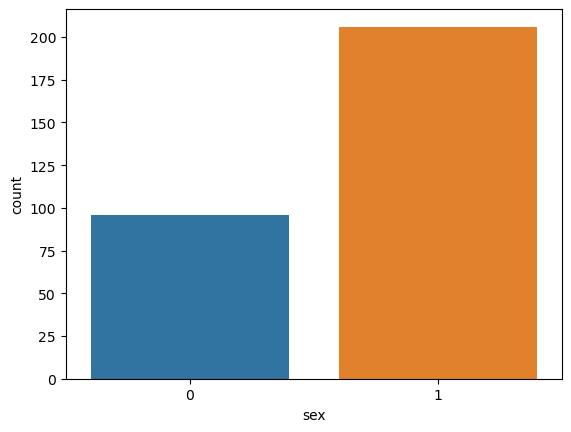

In [14]:
x =(df.sex.value_counts())
print(f'Numbers of people having sex as 1 are {x[1]} and number of people having sex as 0 {x[0]}')
p = sns.countplot(data = df,x ="sex")
plt.show()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


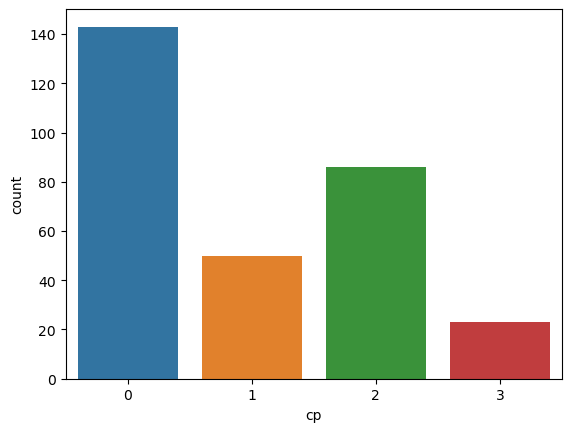

In [15]:
x =(df.cp.value_counts())
print(x)
p = sns.countplot(data = df,x ="cp")
plt.show()

*** AGE DISTRIBUTION ***

<Figure size 1000x1000 with 0 Axes>

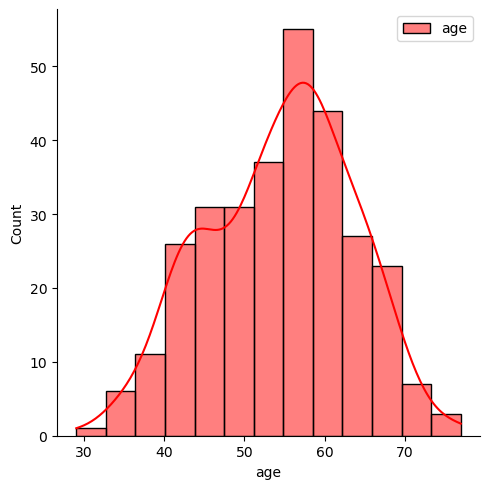

In [18]:
plt.figure(figsize = (10,10))
sns.displot(df.age, color = 'red', label = 'age', kde = True)
plt.legend()
plt.show()

<Figure size 1000x1000 with 0 Axes>

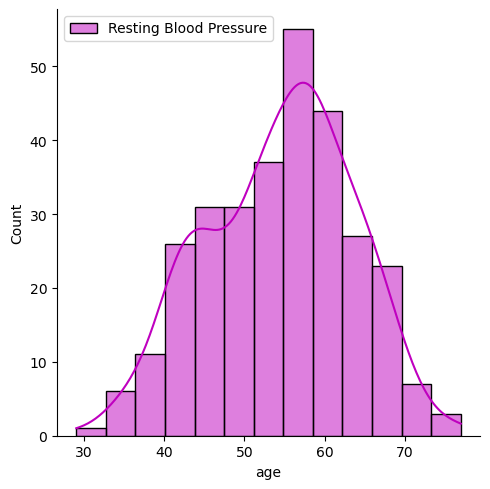

In [21]:
plt.figure(figsize = (10,10))
sns.displot(df.age, color = 'm', label = 'Resting Blood Pressure', kde = True)
plt.legend()
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'title' is not defined

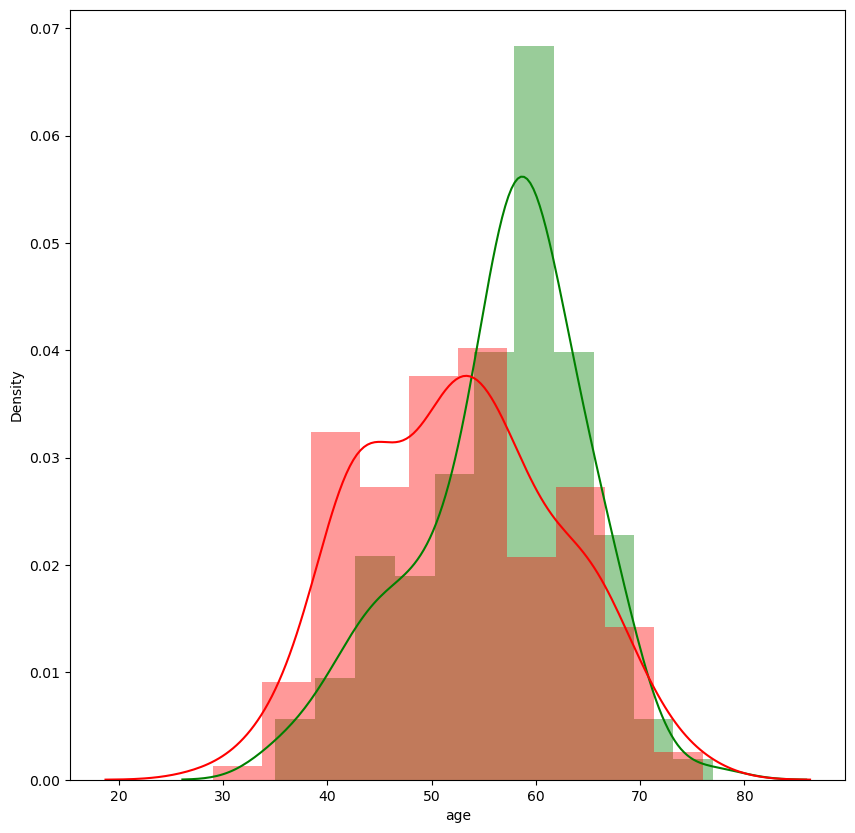

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output']==0]['age'],color = 'green',kde= True)
sns.distplot(df[df['output']==1]['age'],color = 'red' , kde =True)
plt,title("Atteck Vs Age")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'title' is not defined

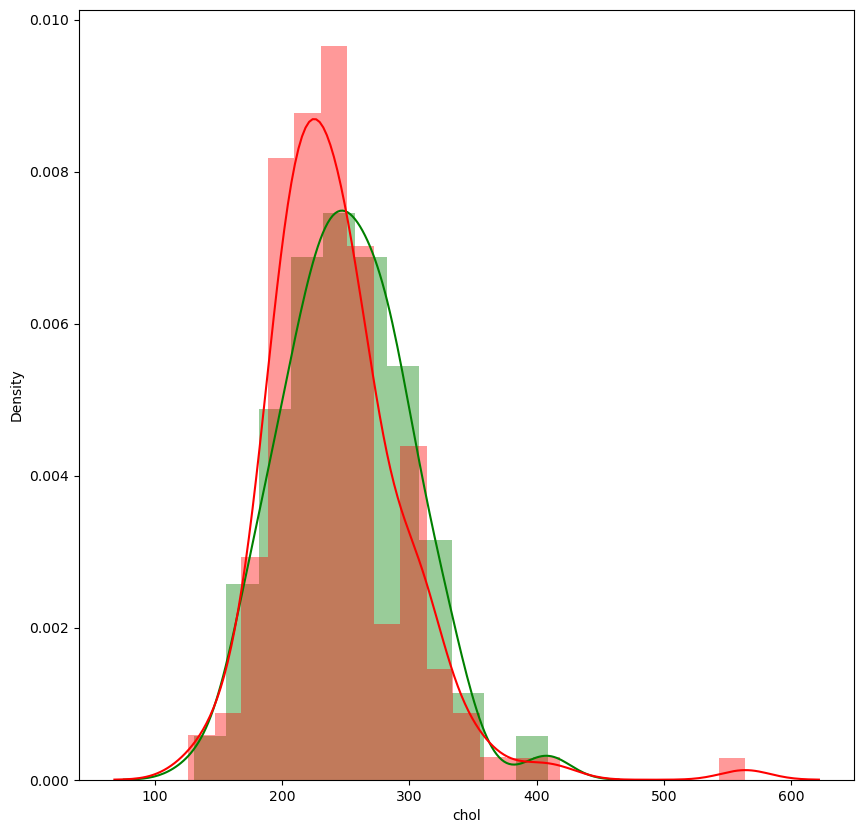

In [25]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output']==0]['chol'],color = 'green',kde= True)
sns.distplot(df[df['output']==1]['chol'],color = 'red' , kde =True)
plt,title("Atteck Vs Age")
plt.show()

In [26]:
y = df.iloc[:, - 1].values
x = df.iloc[:, 1:-1].values

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state =42, test_size = 0.25)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [41]:
y_pred = gnb.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.868421052631579